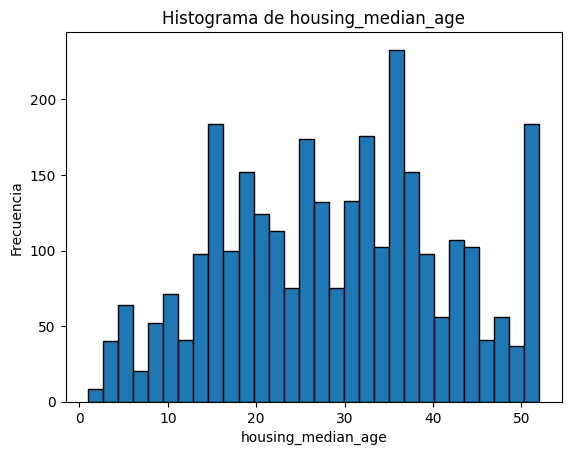

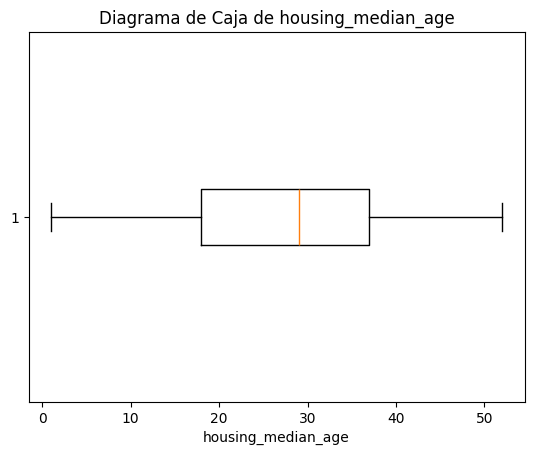

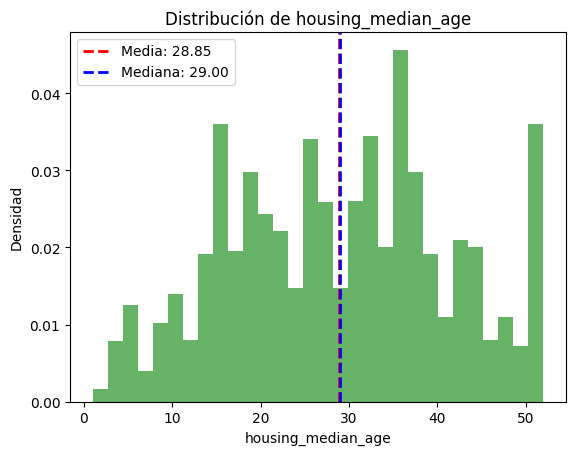


Resumen estadístico de housing_median_age:
Media: 28.85
Mediana: 29.00
Desviación estándar: 12.56
--------------------------------------------------


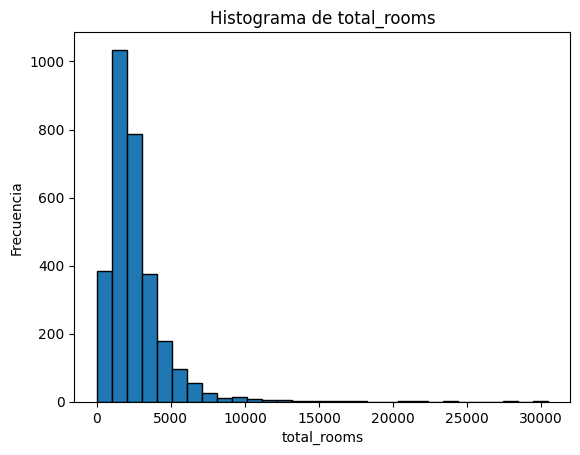

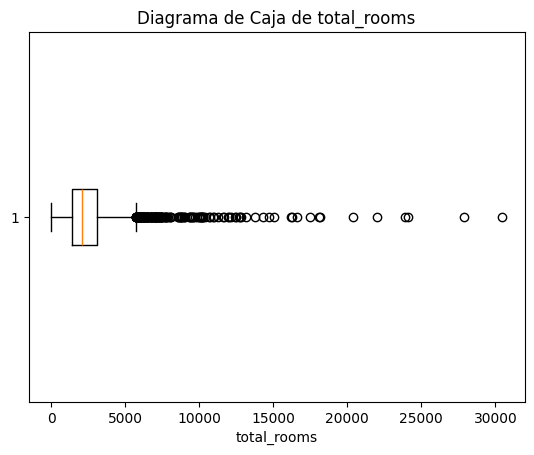

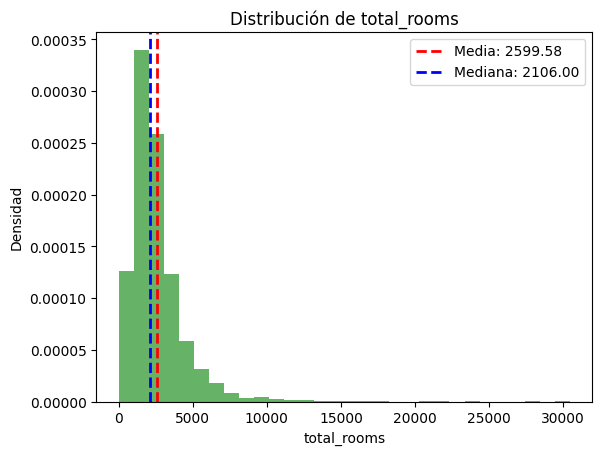


Resumen estadístico de total_rooms:
Media: 2599.58
Mediana: 2106.00
Desviación estándar: 2155.59
--------------------------------------------------


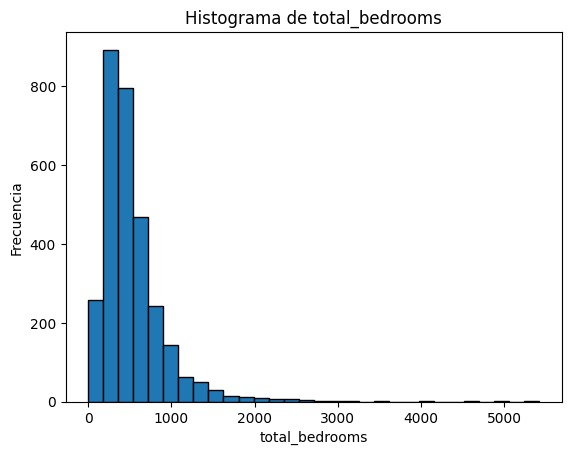

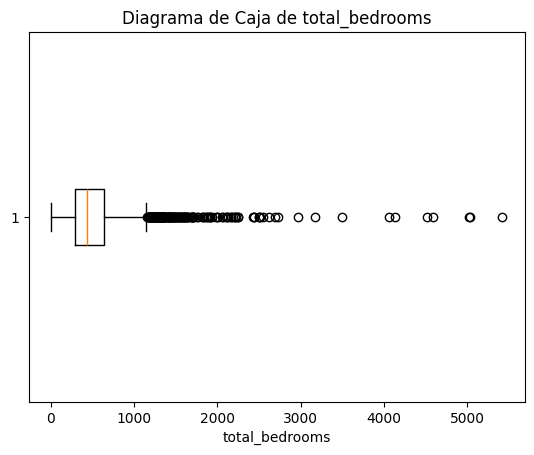

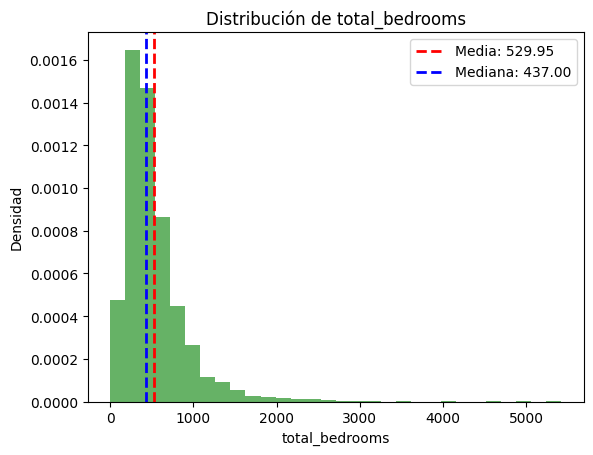


Resumen estadístico de total_bedrooms:
Media: 529.95
Mediana: 437.00
Desviación estándar: 415.65
--------------------------------------------------


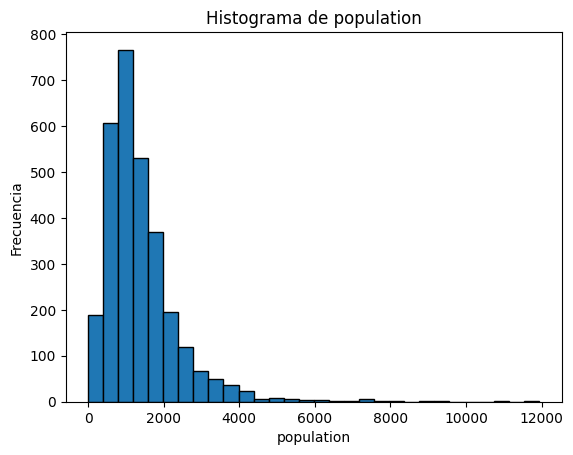

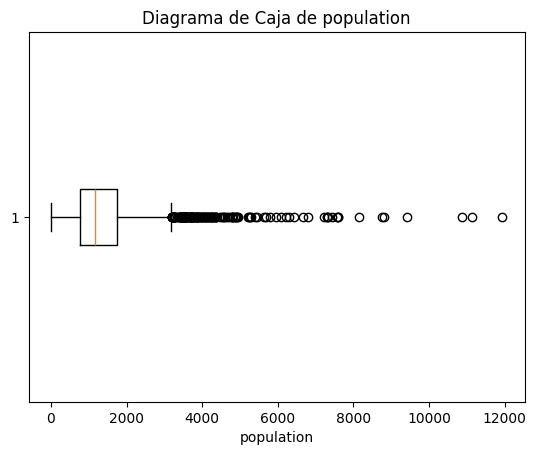

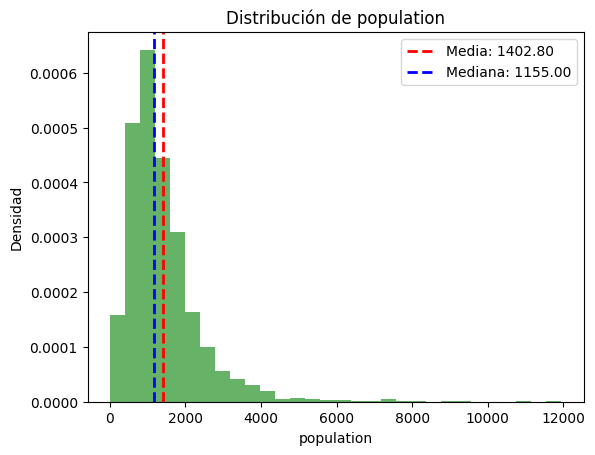


Resumen estadístico de population:
Media: 1402.80
Mediana: 1155.00
Desviación estándar: 1030.54
--------------------------------------------------


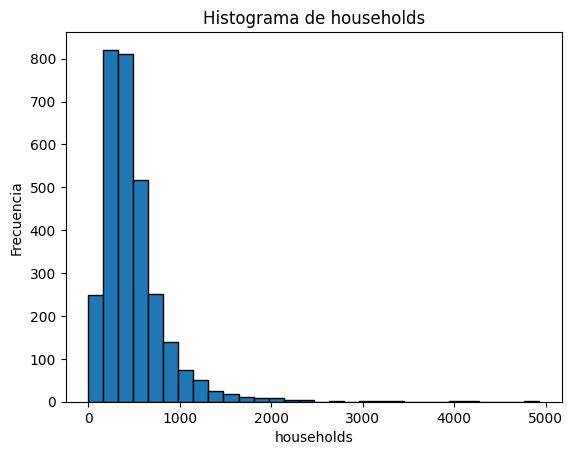

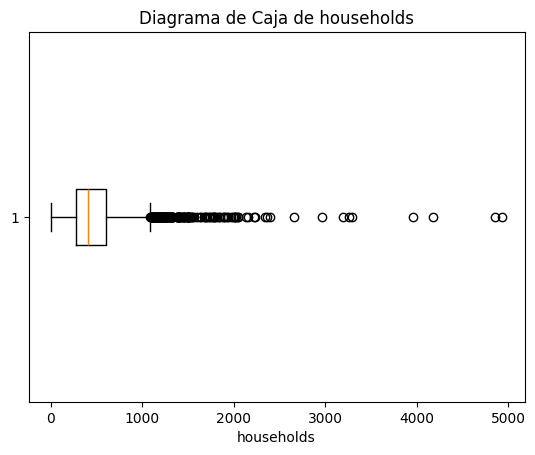

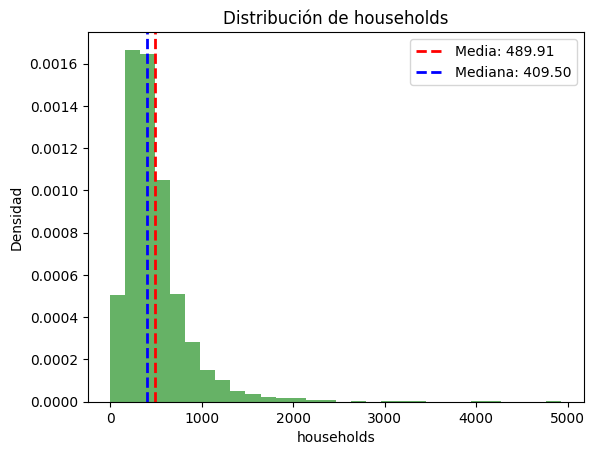


Resumen estadístico de households:
Media: 489.91
Mediana: 409.50
Desviación estándar: 365.42
--------------------------------------------------


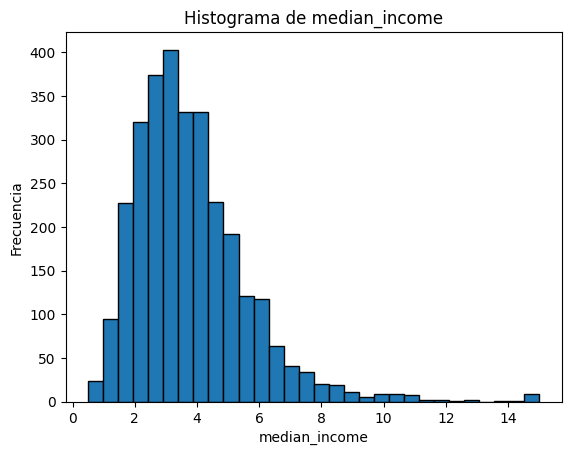

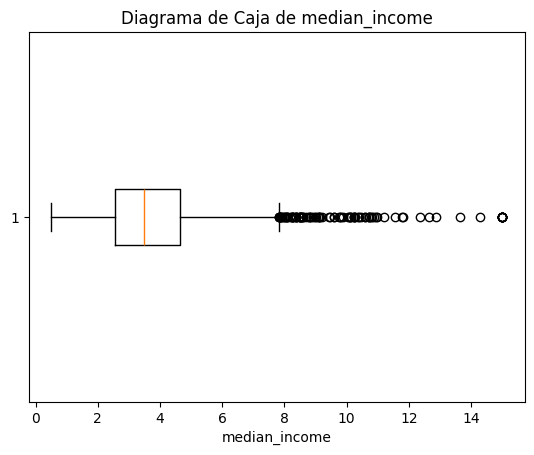

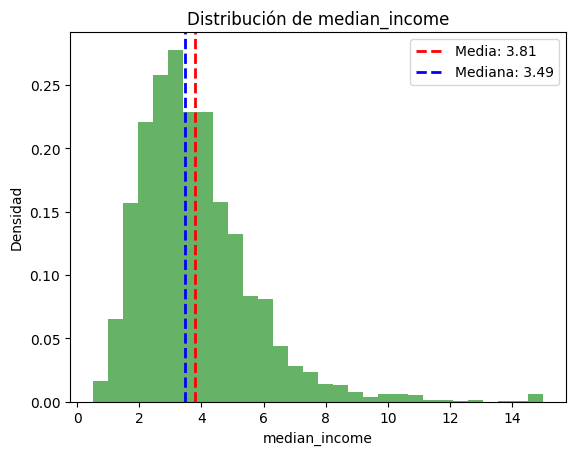


Resumen estadístico de median_income:
Media: 3.81
Mediana: 3.49
Desviación estándar: 1.85
--------------------------------------------------


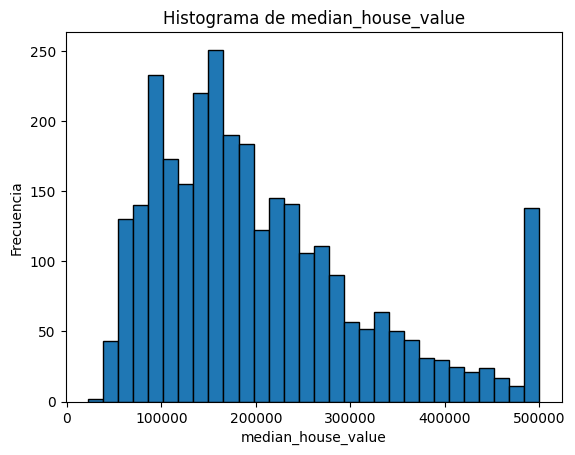

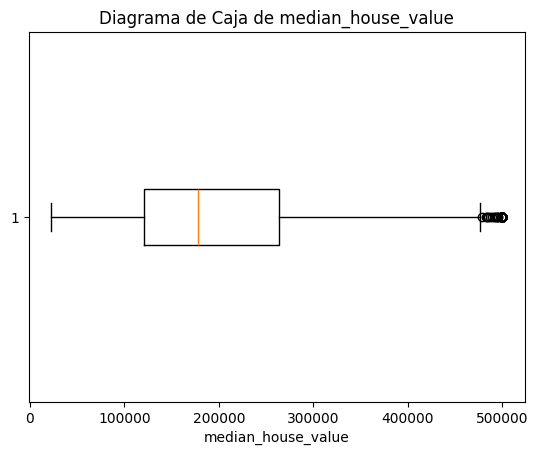

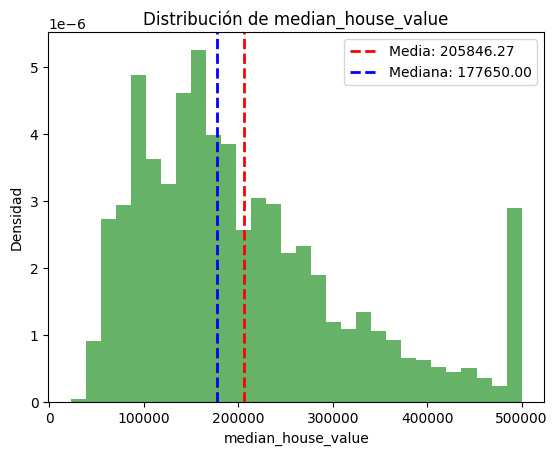


Resumen estadístico de median_house_value:
Media: 205846.27
Mediana: 177650.00
Desviación estándar: 113119.69
--------------------------------------------------

Matriz de correlación:
Correlación entre housing_median_age y total_rooms: -0.37
Correlación entre housing_median_age y median_house_value: 0.09
Correlación entre total_rooms y median_house_value: 0.16


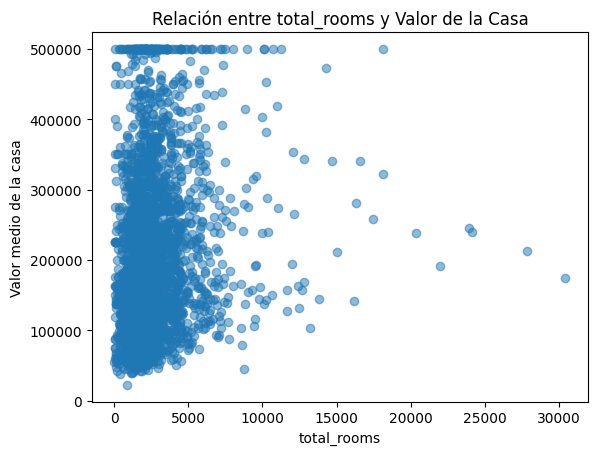

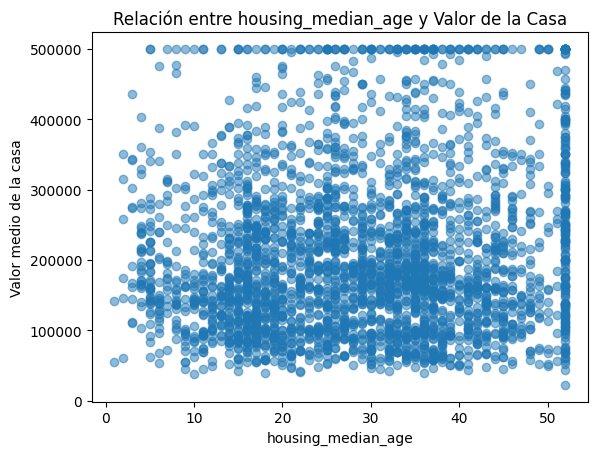

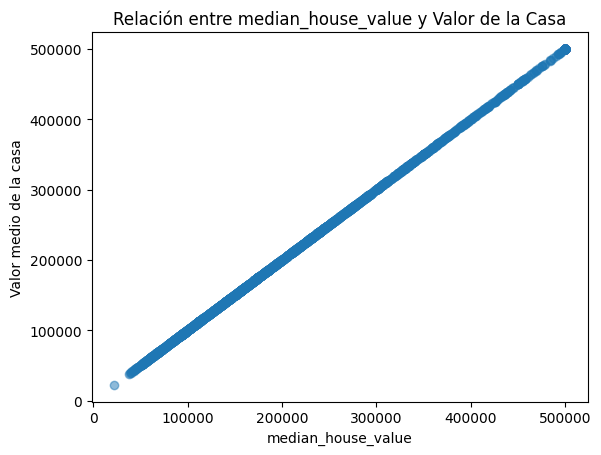

In [ ]:
import matplotlib.pyplot as plt

file_path = "/content/sample_data/california_housing_test.csv"
with open(file_path, 'r') as file:
    data = [line.strip().split(',') for line in file]

titles = data[0]
titles = [t.strip(' "') for t in titles]
data = data[1:]

def convert_column(data, index):
    return [float(row[index]) for row in data if row[index] != '']

variables_univariadas = ["housing_median_age", "total_rooms", "total_bedrooms", "population", "households", "median_income", "median_house_value"]
variables_bivariadas = ["housing_median_age", "total_rooms", "median_house_value"]
indices = {var: titles.index(var) for var in variables_univariadas}

def calcular_media(lista):
    return sum(lista) / len(lista)

def calcular_mediana(lista):
    lista_ordenada = sorted(lista)
    n = len(lista_ordenada)
    if n % 2 == 0:
        return (lista_ordenada[n//2 - 1] + lista_ordenada[n//2]) / 2
    else:
        return lista_ordenada[n//2]

def calcular_desviacion(lista, media):
    varianza = sum((x - media) ** 2 for x in lista) / (len(lista) - 1)
    return varianza ** 0.5

    # Gráficos
for var in variables_univariadas:
    col_data = convert_column(data, indices[var])
    media = calcular_media(col_data)
    mediana = calcular_mediana(col_data)
    desviacion = calcular_desviacion(col_data, media)

    # Histograma
    plt.hist(col_data, bins=30, edgecolor='black')
    plt.title(f"Histograma de {var}")
    plt.xlabel(var)
    plt.ylabel("Frecuencia")
    plt.show()

    # Boxplot O CAJA
    plt.boxplot(col_data, vert=False)
    plt.title(f"Diagrama de Caja de {var}")
    plt.xlabel(var)
    plt.show()

    # Gráfico de Dispersión de distribución
    plt.hist(col_data, bins=30, density=True, alpha=0.6, color='g')
    plt.axvline(media, color='r', linestyle='dashed', linewidth=2, label=f"Media: {media:.2f}")
    plt.axvline(mediana, color='b', linestyle='dashed', linewidth=2, label=f"Mediana: {mediana:.2f}")
    plt.legend()
    plt.title(f"Distribución de {var}")
    plt.xlabel(var)
    plt.ylabel("Densidad")
    plt.show()

    print(f"\nResumen estadístico de {var}:")
    print(f"Media: {media:.2f}")
    print(f"Mediana: {mediana:.2f}")
    print(f"Desviación estándar: {desviacion:.2f}")
    print("-"*50)

    # Correlación
def calcular_correlacion(lista1, lista2):
    media1, media2 = calcular_media(lista1), calcular_media(lista2)
    num = sum((x - media1) * (y - media2) for x, y in zip(lista1, lista2))
    den1 = sum((x - media1) ** 2 for x in lista1) ** 0.5
    den2 = sum((y - media2) ** 2 for y in lista2) ** 0.5
    return num / (den1 * den2)

print("\nMatriz de correlación:")
for i, var1 in enumerate(variables_bivariadas):
    for j, var2 in enumerate(variables_bivariadas):
        if i < j:
            col1, col2 = convert_column(data, indices[var1]), convert_column(data, indices[var2])
            correlacion = calcular_correlacion(col1, col2)
            print(f"Correlación entre {var1} y {var2}: {correlacion:.2f}")

    # Gráfico Dispersión análisis bivariado
for var in ["total_rooms", "housing_median_age", "median_house_value"]:
    col_x = convert_column(data, indices[var])
    col_y = convert_column(data, indices["median_house_value"])
    plt.scatter(col_x, col_y, alpha=0.5)
    plt.xlabel(var)
    plt.ylabel("Valor medio de la casa")
    plt.title(f"Relación entre {var} y Valor de la Casa")
    plt.show()